# Tarefa de regressão e previsão

- X1 - Transaction date: Data da transação
- X2 - House age: Idade da casa
- X3 - Distance to the nearest MRT station: Distância até a estação de MRT mais próxima
- X4 - Number of convenience stores: Número de lojas de conveniência nas proximidades
- X5 - Latitude: Latitude da localização do imóvel
- X6 - Longitude: Longitude da localização do imóvel
- y - House price of unit area: Preço por unidade de área do imóvel (rótulo, ou variável a ser prevista

In [ ]:
# impora libs
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# le o csv "data.csv"
df = pd.read_csv("Real_estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.shape

(414, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


<Axes: >

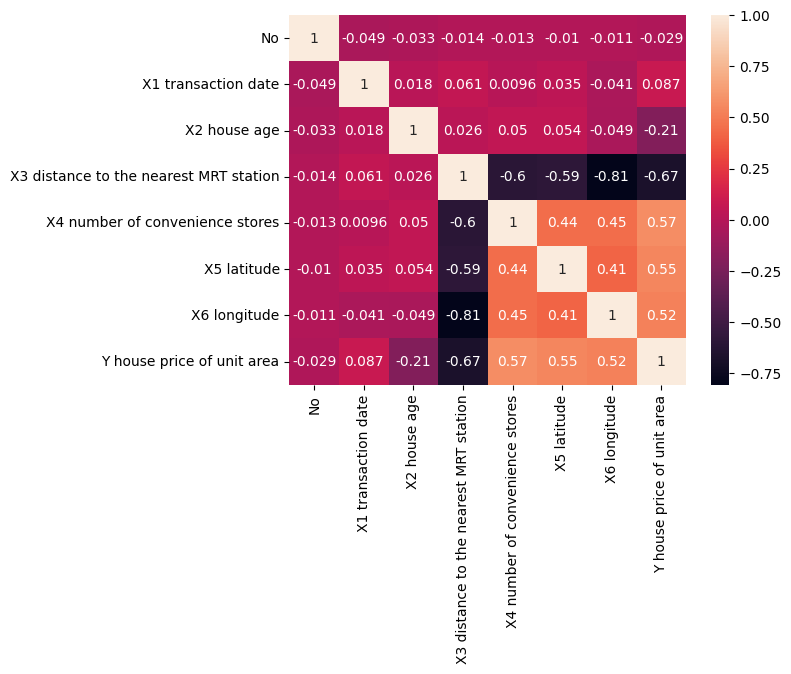

In [ ]:
# Corr de pearson em heatmap
corr = df.corr(method="pearson")

sns.heatmap(corr, annot=True)

In [ ]:
# importando o PCA
from sklearn.decomposition import PCA

# Questão 1
house_age_df = df[["X2 house age", "Y house price of unit area"]]
# house_age_df.head()

# Questão 2
# house_age_df = df[["X3 distance to the nearest MRT station", "Y house price of unit area"]]
# house_age_df.head()

# Questão 3 (X1 até o X6 como parametro)
# house_age_df = df[["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores", "X5 latitude", "X6 longitude", "Y house price of unit area"]]

# Questão 4 make PCA to 2 collumns, and tra

house_age_df

,X2 house age,Y house price of unit area
0,32.0,37.9
1,19.5,42.2
2,13.3,47.3
3,13.3,54.8
4,5.0,43.1
...,...,...
409,13.7,15.4
410,5.6,50.0
411,18.8,40.6
412,8.1,52.5


In [ ]:
# importando train_test_split com config de 80-20 e rs de 42
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(house_age_df, test_size=0.2, random_state=42)

In [ ]:
train_df.head()

,X2 house age,Y house price of unit area
192,43.8,42.7
234,8.0,23.9
5,7.1,32.1
45,36.6,38.3
245,7.5,40.8


# O que a função train_test_split faz?

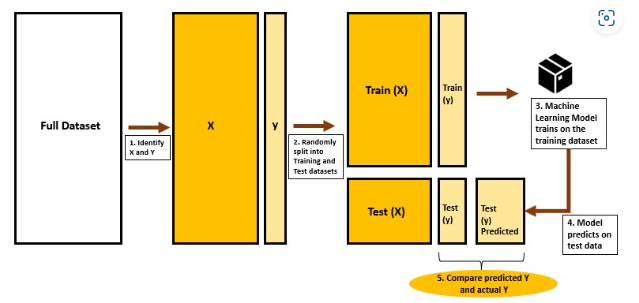

Essa função faz a separação do dataset em dois subsets (dois datasets menores) com base nos valores que passamos.
- Quero que pegue 80% dos valores e crie um.
- Quero que pegue 20% dos valores e crie outro.
- Random state faz a lib usar um algoritmo diferente para randomizar quem vai pra qual dataset (guarda a seed e garante reprodutibilidade, pq se colcoar random state X no meu PC ou no seu, fica o mesmo train_test_split) se não colocar, gera aleatório sempre.

A doc recomenda usar:
- 0 (pq é padrão)
- 42 (mochileiro das galaxia)

### Treinando o modelo

**COMO USAR:**

- Treinamento só com idade da casa
- Treinamento só com Distância até o metrô
- Treinamento com todas colunas

In [ ]:
# Realizando a regressão linear (LinearRegression()) no df
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Treino com base apenas na idade da casa
model.fit(train_df[["X2 house age"]], train_df[["Y house price of unit area"]])
model_result = model.predict(test_df[['X2 house age']])

# Treino com base apenas na distância até um metrô
# model.fit(train_df[['X3 distance to the nearest MRT station']], train_df[['Y house price of unit area']])
# model_result = model.predict(test_df[['X3 distance to the nearest MRT station']])

# Teste com todas colunas
# model.fit(train_df[["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores", "X5 latitude", "X6 longitude"]], train_df[["Y house price of unit area"]])
# model_result = model.predict(test_df[["X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores", "X5 latitude", "X6 longitude"]])

#predict (muda com oqq pever)
model_result # resultado pra cada X que ele previu

array([[42.59713414],
       [39.45375037],
       [42.8828963 ],
       [39.58364226],
       [37.63526389],
       [34.43992336],
       [38.75233415],
       [38.67439902],
       [34.59579363],
       [41.16832333],
       [36.3103666 ],
       [41.84376117],
       [41.55799901],
       [34.64775039],
       [32.85524229],
       [39.06407469],
       [34.1541612 ],
       [41.99963144],
       [38.38863686],
       [38.96016118],
       [34.85557741],
       [38.23276659],
       [41.48006387],
       [39.34983685],
       [39.37581523],
       [39.58364226],
       [38.67439902],
       [42.8828963 ],
       [32.25773959],
       [32.15382607],
       [36.15449633],
       [41.55799901],
       [34.38796661],
       [38.20678821],
       [38.59646388],
       [33.08904769],
       [41.35017198],
       [39.32385848],
       [34.93351255],
       [32.1278477 ],
       [33.60861526],
       [37.34950173],
       [34.56981525],
       [38.83026929],
       [39.50570712],
       [40

In [ ]:
# mostra os Y preditos e os Y real em um dataset
compare = pd.DataFrame({"Y real": test_df["Y house price of unit area"], "Y predicted": model_result.flatten()})
compare

,Y real,Y predicted
358,45.1,42.597134
350,42.3,39.453750
373,52.2,42.882896
399,37.3,39.583642
369,22.8,37.635264
...,...,...
31,25.0,35.193296
283,23.5,34.180140
157,35.6,38.700377
203,46.1,38.830269


In [ ]:
# Mostra métricas de erro usando o sklearn
import sklearn.metrics as metrics
#
# MSE
# RMSE
# MAE
# R²

print("MSE: ", metrics.mean_squared_error(test_df["Y house price of unit area"], model_result))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(test_df["Y house price of unit area"], model_result)))
print("MAE: ", metrics.mean_absolute_error(test_df["Y house price of unit area"], model_result))
print("R²: ", metrics.r2_score(test_df["Y house price of unit area"], model_result))

MSE:  165.2051150828318
RMSE:  12.853214192676935
MAE:  10.621234812005051
R²:  0.015227904910820378


In [ ]:
# Quais os pesos que o modelo acha que é?
model.coef_ # array com os valores estimados pros coeficiente

array([[-0.25978378]])

# Métricas

Usando **TODOS** (tem maior precisão, mas poderia ser melhor usando redução de dimensionalidade):
- MSE:  53.505619124504506
- RMSE:  7.314753524521828
- MAE:  5.305355690074184
- R²:  0.6810580555095801

Usando distância do Metrô (influência no preço e por isso é maior o erro):
- MSE:  77.34399178518461
- RMSE:  8.794543295998071
- MAE:  6.920972703573579
- R²:  0.538959766501977

Usando **Idade da casa** (não influencia no preço tanto quanto os outros):
- MSE:  165.2051150828318
- RMSE:  12.853214192676935
- MAE:  10.621234812005051
- R²:  0.015227904910820378